## Visualising the data

In [2]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
# Set HLA of interest - change dynamically
hla = 'A*02'
hla_name = hla.replace('*','')

In [4]:
# Set up file names

os.chdir("/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires")

metadata = pd.read_csv("/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/Cohort01_whole_metadata.tsv", sep="\t") 


metadata_annotat = metadata[metadata['sample_tags'].str.contains(f'HLA-{hla}',case=False, regex = False)]

metadata_annotat = metadata_annotat[metadata_annotat['sample_tags'].str.contains(r'\bcytomegalovirus|CNV\b', case=False, na=False)]
metadata_annotat = metadata_annotat.reset_index(drop=True)

file_names = [name + '.tsv' for name in metadata_annotat['sample_name'].tolist()]

In [16]:
exp_name = 'AC02'

records_file_name = f'NEW_{exp_name}_hits.csv'

records_file_path = f'/Users/ishaharris/Projects/TCR/TCR-Isha/data/Processed/{records_file_name}'

records_df = pd.read_csv(records_file_path)
records_df.shape

(3985, 4)

### Hits per ID

I think this is irrelevant because now we have frequency

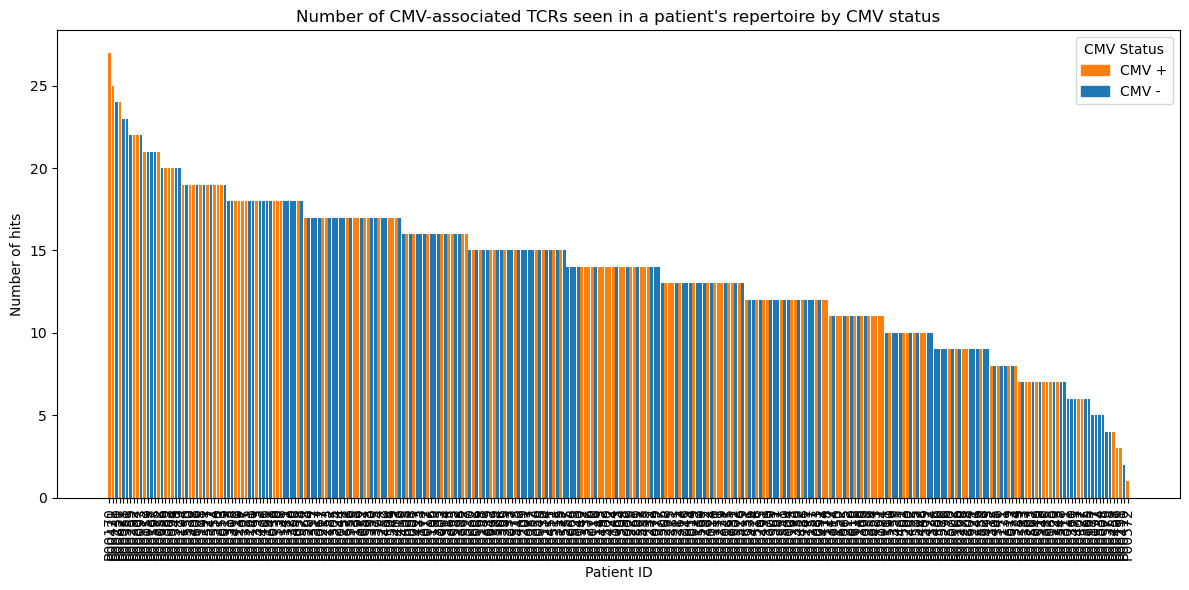

In [9]:
hits_per_id = records_df['patient_id'].value_counts().reset_index()
hits_per_id.columns = ['patient_id', 'hits']

unique_cmv_status = records_df[['patient_id','cmv_status']].drop_duplicates()

hits_per_id = hits_per_id.merge(unique_cmv_status, on='patient_id', how='left')

# Draw a histogram
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 6))

# Create bar colors based on CMV status
colors = hits_per_id['cmv_status'].map({
    'Positive': 'tab:orange',
    'Negative': 'tab:blue'
    # Add more if you have more CMV categories
})

# Plot the bar chart
plt.bar(hits_per_id['patient_id'], hits_per_id['hits'], color=colors)

# Labels and formatting
plt.xlabel('Patient ID')
plt.ylabel('Number of hits')
plt.title("Number of CMV-associated TCRs seen in a patient's repertoire by CMV status")
plt.xticks(rotation=90)  # Rotate patient IDs for better visibility
plt.tight_layout()

# Add a legend
plt.legend(handles=[plt.Rectangle((0,0),1,1, color='tab:orange'), plt.Rectangle((0,0),1,1, color='tab:blue')],
           labels=['CMV +', 'CMV -'], title='CMV Status')
plt.show()



In [10]:
hits_per_seq = records_df['sequence'].value_counts().reset_index()
hits_per_seq
records_df

,patient_id,sequence,frequency,cmv_status
0,P00492,CASGPSNQPQHF,1.373438e-06,Positive
1,P00492,CASRDGRNYGYTF,6.867188e-07,Positive
2,P00492,CASSSANYGYTF,1.405027e-04,Positive
3,P00492,CASSLTGYGYTF,1.922813e-06,Positive
4,P00492,CASSLGQGQPQHF,2.334844e-06,Positive
...,...,...,...,...
3980,P00289,CASSLGQGQPQHF,8.377939e-06,Positive
3981,P00289,CASSFQGYTEAFF,2.345823e-05,Positive
3982,P00289,CASSLGETQYF,6.702351e-06,Positive
3983,P00289,CSVGTGGTNEKLFF,3.351176e-06,Positive


Hits per Seq

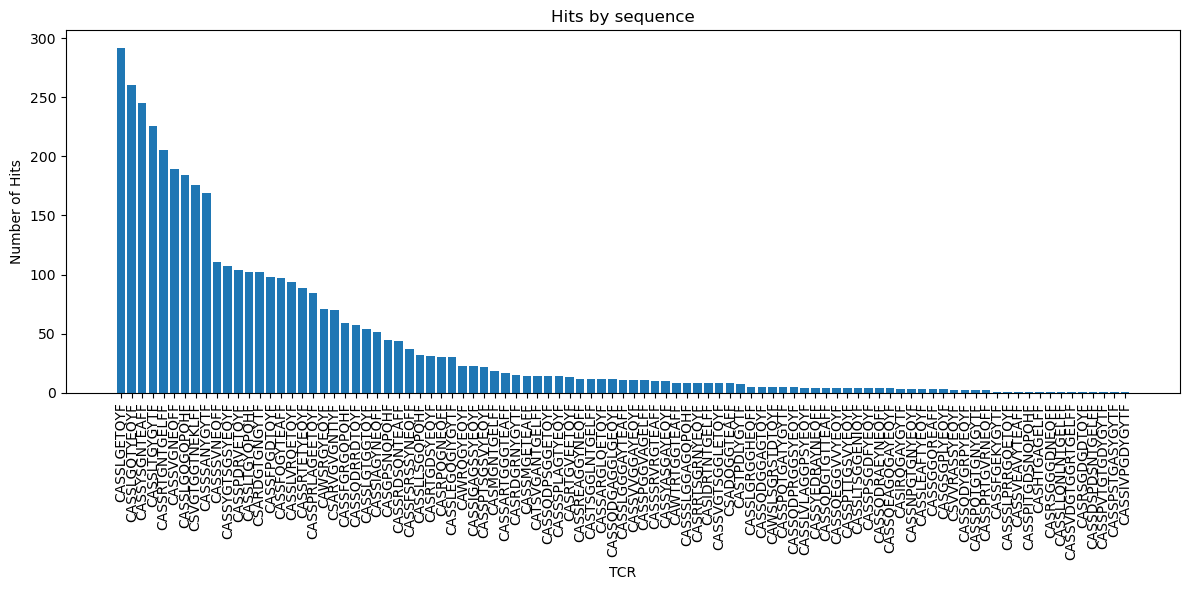

In [21]:
hits_per_seq = records_df['sequence'].value_counts().reset_index()
hits_per_seq.columns = ['sequence', 'hits']

#unique_cmv_status = records_df[['patient_id','cmv_status']].drop_duplicates()

#hits_per_id = hits_per_id.merge(unique_cmv_status, on='patient_id', how='left')

# Draw a histogram
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 6))

# Create bar colors based on CMV status
#colors = hits_per_seq['cmv_status'].map({
    #'Positive': 'tab:orange',
    #'Negative': 'tab:blue'
    # Add more if you have more CMV categories})

# Plot the bar chart
plt.bar(hits_per_seq['sequence'], hits_per_seq['hits'])

# Labels and formatting
plt.xlabel('TCR')
plt.ylabel('Number of Hits')
plt.title("Hits by sequence")
plt.xticks(rotation=90)  # Rotate patient IDs for better visibility
plt.tight_layout()

# Add a legend

plt.show()



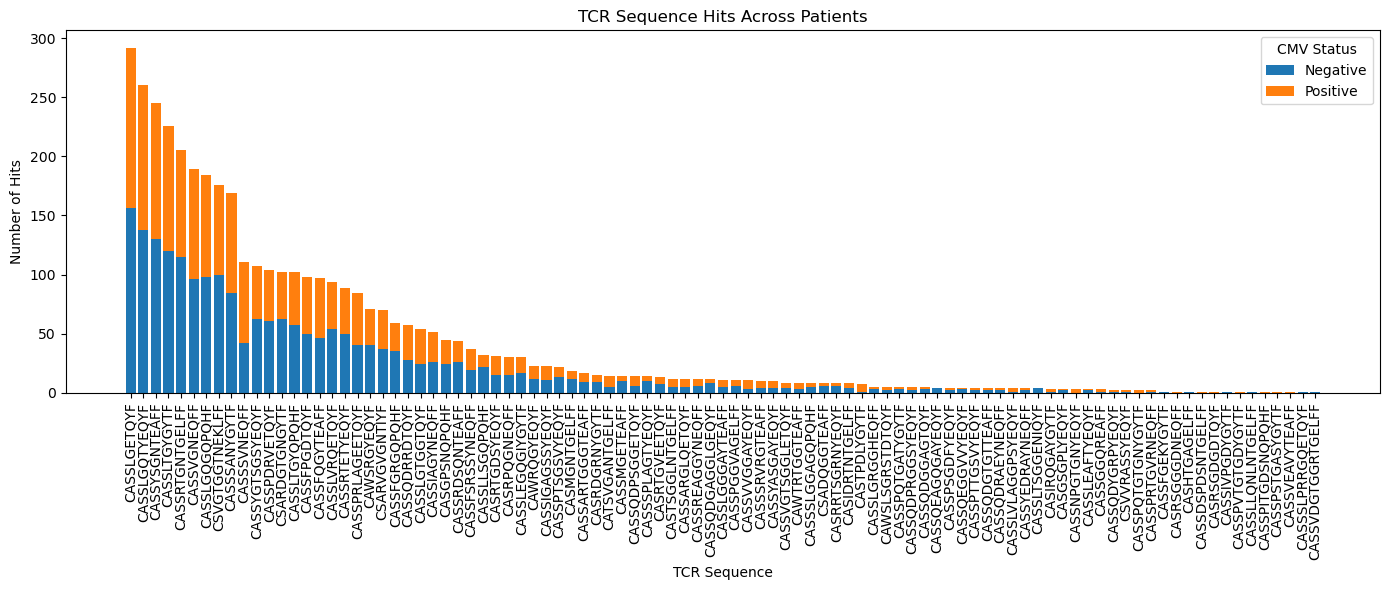

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by sequence and CMV status
grouped = records_df.groupby(['sequence', 'cmv_status']).size().unstack(fill_value=0)

# Optional: Sort by total hits
grouped = grouped.loc[grouped.sum(axis=1).sort_values(ascending=False).index]

# Define custom colors
color_map = {
    'Positive': 'tab:orange',
    'Negative': 'tab:blue'
    # Add more if needed
}

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot each CMV status as a separate bar layer for stacking
bottom = pd.Series([0] * len(grouped), index=grouped.index)

for status in grouped.columns:
    ax.bar(grouped.index, grouped[status], bottom=bottom, label=status,
           color=color_map.get(status, 'gray'))
    bottom += grouped[status]

# Labels and formatting
ax.set_xlabel('TCR Sequence')
ax.set_ylabel('Number of Hits')
ax.set_title("TCR Sequence Hits Across Patients")
ax.set_xticks(range(len(grouped.index)))
ax.set_xticklabels(grouped.index, rotation=90)
plt.tight_layout()
plt.legend(title="CMV Status")

plt.show()


### Cumulative hit rate
First, for unique sequences. 

In [23]:
# Load the data
exp_name = 'AC02'

records_file_name = f'{exp_name}_hits.csv'

records_file_path = f'/Users/ishaharris/Projects/TCR/TCR-Isha/data/Processed/{records_file_name}'

records_df = pd.read_csv(records_file_path)

records_df

,patient_id,sequence,count,cmv_status
0,P00492,CSARVGVGNTIYF,1,Positive
1,P00492,CASSRTGNTGELFF,1,Positive
2,P00492,CASSLGTGGTQYF,1,Positive
3,P00492,CASSLVLAGGPSYEQYF,2,Positive
4,P00492,CSVVRASSYEQYF,1,Positive
...,...,...,...,...
3980,P00289,CSVGTGGTNEKLFF,3,Positive
3981,P00289,CASSLGETQYF,2,Positive
3982,P00289,CASSSANYGYTF,1,Positive
3983,P00289,CASSLTGYGYTF,1,Positive


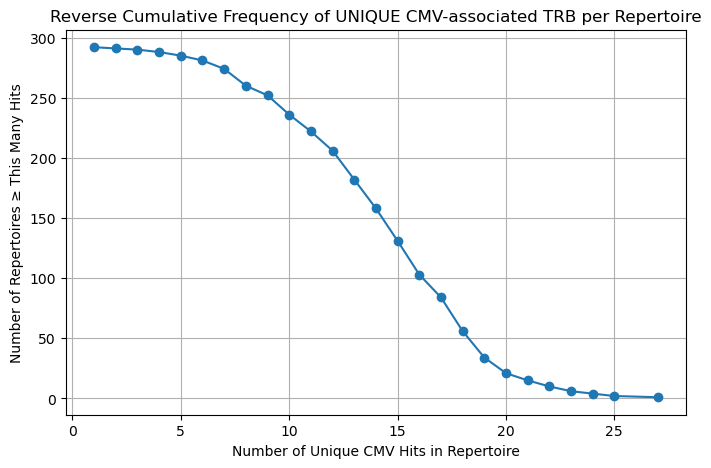

In [24]:
# Count unique hits per patient

unique_hits = records_df.groupby('patient_id')['sequence'].nunique()

hit_counts = unique_hits.value_counts().sort_index()

rcf = hit_counts[::-1].cumsum()[::-1]

# Step 4: Plot
plt.figure(figsize=(8, 5))
plt.plot(rcf.index, rcf.values, marker='o')
plt.xlabel('Number of Unique CMV Hits in Repertoire')
plt.ylabel('Number of Repertoires ≥ This Many Hits')
plt.title('Reverse Cumulative Frequency of UNIQUE CMV-associated TRB per Repertoire')
plt.grid(True)
plt.show()

Now for all hits, not just unique

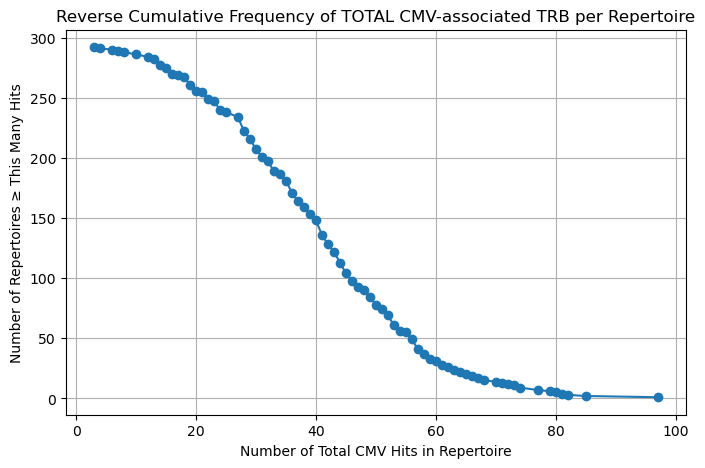

In [25]:
# Sum total CMV-associated hits (including clone size) per patient
total_hits = records_df.groupby('patient_id')['count'].sum()

hit_counts = total_hits.value_counts().sort_index()

rcf = hit_counts[::-1].cumsum()[::-1]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(rcf.index, rcf.values, marker='o')
plt.xlabel('Number of Total CMV Hits in Repertoire')
plt.ylabel('Number of Repertoires ≥ This Many Hits')
plt.title('Reverse Cumulative Frequency of TOTAL CMV-associated TRB per Repertoire')
plt.grid(True)
plt.show()


### Summarise each patient
For better analysis, we can lose the sequence info (but remember that it's still available in records_df)

In [17]:
records_df

,patient_id,sequence,frequency,cmv_status
0,P00492,CASGPSNQPQHF,1.373438e-06,Positive
1,P00492,CASRDGRNYGYTF,6.867188e-07,Positive
2,P00492,CASSSANYGYTF,1.405027e-04,Positive
3,P00492,CASSLTGYGYTF,1.922813e-06,Positive
4,P00492,CASSLGQGQPQHF,2.334844e-06,Positive
...,...,...,...,...
3980,P00289,CASSLGQGQPQHF,8.377939e-06,Positive
3981,P00289,CASSFQGYTEAFF,2.345823e-05,Positive
3982,P00289,CASSLGETQYF,6.702351e-06,Positive
3983,P00289,CSVGTGGTNEKLFF,3.351176e-06,Positive


In [36]:
# records_df =  long table above
per_patient = (records_df
    .groupby(["patient_id", "cmv_status"])
    .agg(unique_hits   = ("sequence", "nunique"),
         total_hits    = ("count",    "sum"),
         max_size      = ("count",    "max"),
         mean_size     = ("count",    "mean"),
         median_size   = ("count",    "median"))
    .reset_index())


In [27]:
# Define function to add in the maximum clonotype size

from pathlib import Path

print (f"There are {len(file_names)} repertoires which are HLA-{hla} associated")


folder_path = "/Volumes/IshaVerbat/Isha/TCR/All_Emerson_Cohort01_cdr3_only"

def repertoire_size(folder_path, file_list):
    rep_size = []
    for i, file in enumerate(file_list, start =1):
        print (f'Processing file {file}')
        print(i)
        
        file_path = Path(folder_path) / file
        df = pd.read_csv(file_path, sep='\t', dtype='str')

        seqs = df['cdr3_amino_acid'].astype(str).str.strip().str.strip('""')
        seqs = seqs[seqs != ""]
        print(f'Before drop na: {len(seqs)}')

        seqs = seqs.replace({'': None, 'nan': None, 'NaN': None})
        seqs = seqs.dropna()
        print(f'After drop na: {len(seqs)}')
        

        rep_size.append({
            "patient_id":file.replace('.tsv',''),
            "total_rep_seqs": len(seqs),
            "unique_rep_seqs": seqs.nunique()

        })
    return pd.DataFrame(rep_size)    

There are 292 repertoires which are HLA-A*02 associated


In [28]:
aco2_size = repertoire_size(folder_path,file_names)

Processing file P00492.tsv
1
Before drop na: 332924
After drop na: 284350
Processing file P00412.tsv
2
Before drop na: 336010
After drop na: 275960
Processing file P00416.tsv
3
Before drop na: 260017
After drop na: 212178
Processing file P00037.tsv
4
Before drop na: 330252
After drop na: 267756
Processing file P00346.tsv
5
Before drop na: 123519
After drop na: 103760
Processing file P00353.tsv
6
Before drop na: 208056
After drop na: 173271
Processing file P00278.tsv
7
Before drop na: 240732
After drop na: 197888
Processing file P00260.tsv
8
Before drop na: 137887
After drop na: 116603
Processing file P00208.tsv
9
Before drop na: 179361
After drop na: 147490
Processing file P00143.tsv
10
Before drop na: 201686
After drop na: 173861
Processing file P00085.tsv
11
Before drop na: 61255
After drop na: 51217
Processing file P00625.tsv
12
Before drop na: 129506
After drop na: 107008
Processing file P00572.tsv
13
Before drop na: 12937
After drop na: 11177
Processing file P00496.tsv
14
Before d

In [35]:
aco2_size
per_patient

,patient_id,cmv_status,unique_hits,total_hits,max_size,mean_size,median_size,total_rep_seqs_x,unique_rep_seqs_x,total_rep_seqs_y,unique_rep_seqs_y,total_rep_seqs,unique_rep_seqs,prop_hits
0,P00002,Negative,9,21,12,2.333333,1.0,98453,94233,98453,94233,98453,94233,0.000213
1,P00003,Positive,16,47,15,2.937500,2.0,164133,153181,164133,153181,164133,153181,0.000286
2,P00004,Negative,12,28,12,2.333333,1.0,202265,184309,202265,184309,202265,184309,0.000138
3,P00006,Negative,14,40,15,2.857143,2.0,209700,192869,209700,192869,209700,192869,0.000191
4,P00007,Positive,16,35,13,2.187500,1.0,176199,163853,176199,163853,176199,163853,0.000199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,P00653,Positive,19,56,22,2.947368,1.0,233296,213913,233296,213913,233296,213913,0.000240
288,P00656,Negative,20,56,24,2.800000,1.0,211277,190853,211277,190853,211277,190853,0.000265
289,P00657,Positive,17,44,16,2.588235,1.0,206718,189419,206718,189419,206718,189419,0.000213
290,P00662,Positive,16,45,20,2.812500,1.5,218919,199500,218919,199500,218919,199500,0.000206


In [37]:
# Merge dfs with patient_id as the key
per_patient = per_patient.merge(aco2_size[['patient_id', 'total_rep_seqs', 'unique_rep_seqs']], on='patient_id', how='left')


In [38]:
per_patient["prop_hits"] = per_patient.total_hits / per_patient.total_rep_seqs
per_patient

,patient_id,cmv_status,unique_hits,total_hits,max_size,mean_size,median_size,total_rep_seqs,unique_rep_seqs,prop_hits
0,P00002,Negative,9,21,12,2.333333,1.0,98453,94233,0.000213
1,P00003,Positive,16,47,15,2.937500,2.0,164133,153181,0.000286
2,P00004,Negative,12,28,12,2.333333,1.0,202265,184309,0.000138
3,P00006,Negative,14,40,15,2.857143,2.0,209700,192869,0.000191
4,P00007,Positive,16,35,13,2.187500,1.0,176199,163853,0.000199
...,...,...,...,...,...,...,...,...,...,...
287,P00653,Positive,19,56,22,2.947368,1.0,233296,213913,0.000240
288,P00656,Negative,20,56,24,2.800000,1.0,211277,190853,0.000265
289,P00657,Positive,17,44,16,2.588235,1.0,206718,189419,0.000213
290,P00662,Positive,16,45,20,2.812500,1.5,218919,199500,0.000206


In [ ]:
# Save per_patient

output_dir = '/Users/ishaharris/Projects/TCR/TCR-Isha/data/Processed'
file_name = 'per_patient.tsv'
file_path = os.path.join(output_dir, file_name)

per_patient.to_csv(file_path, sep='\t', index=False)


### Violin and box plots
replace feature = "" with what you want to plot

In [41]:
# Load per_patient

per_patient = pd.read_csv('/Users/ishaharris/Projects/TCR/TCR-Isha/data/Processed/per_patient.tsv', sep='\t')

/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_6475/1869703128.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cmv_status', y=feature, data=per_patient, inner='box', palette='muted')


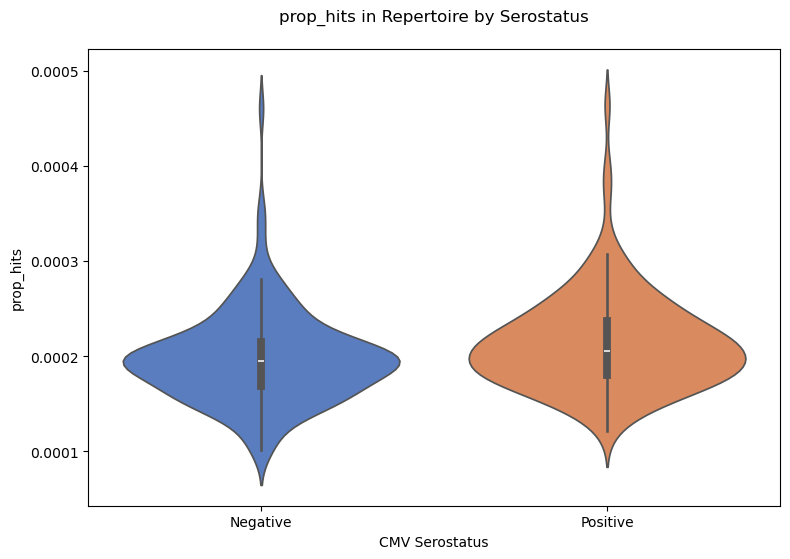

In [ ]:
# Violin plot 
import seaborn as sns
import matplotlib.pyplot as plt

feature = 'prop_hits'

plt.figure(figsize=(8, 6))
sns.violinplot(x='cmv_status', y=feature, data=per_patient, inner='box', palette='muted')

# Left-aligned title and subtitle
plt.title(f'{feature} in Repertoire by Serostatus', fontsize=12, loc='center', pad=20)
#plt.text(
   ## x=0, y=1.03,
    #s='Proportion of total repertoire reads that match high-confidence CMV-associated TCRs as identified by Immudex assay',
   # fontsize=7, ha='left', va='top', transform=plt.gca().transAxes
#)

plt.xlabel('CMV Serostatus')
plt.ylabel(f'{feature}')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # reserve space for title/subtitle
plt.show()


accidentally deleted boxplot cell here

### Are any of the differences in mean significant? 

Welch's t-test, with Bonferroni correction

- Also try Mann-Whitney U, and Kolmogorov-Smirnov
- Linear relation between 'dose' of hits and probability of positivity - univariable logistic regression. ????

In [43]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [45]:
per_patient['cmv_status'] = per_patient['cmv_status'].astype('category')

test_cols = [
    'unique_hits','total_hits','max_size','mean_size', 'median_size', 'total_rep_seqs', 'unique_rep_seqs', 'prop_hits',
]

group_pos = per_patient.loc[per_patient['cmv_status'] == 'Positive']
group_neg = per_patient.loc[per_patient['cmv_status'] == 'Negative']

results = []

for col in test_cols:
    data_pos = group_pos[col].dropna()
    data_neg = group_neg[col].dropna()

    stat, pval = ttest_ind(data_pos, data_neg, equal_var=False)
    results.append((col, stat, pval))
    
    res_df = pd.DataFrame(results, columns=['feature', 't_statistic', 'p_value'])

    # Bonf correction
    rej, pvals_corrected, _, _ = multipletests(res_df['p_value'], method='bonferroni')
    res_df['p_value_bonf'] = pvals_corrected
    res_df['significant_bonf'] = rej

    res_df = res_df.sort_values('p_value')

res_df 

,feature,t_statistic,p_value,p_value_bonf,significant_bonf
7,prop_hits,2.795777,0.005536,0.044287,True
3,mean_size,2.413136,0.016462,0.131696,False
1,total_hits,1.225341,0.221458,1.000000,False
2,max_size,1.161898,0.246262,1.000000,False
6,unique_rep_seqs,-0.558753,0.576762,1.000000,False
5,total_rep_seqs,-0.524556,0.600293,1.000000,False
4,median_size,0.290737,0.771469,1.000000,False
0,unique_hits,0.286304,0.774854,1.000000,False


In [48]:
# Output the actual means for each category. 

for col in test_cols:
    stats = per_patient.groupby('cmv_status')[col].agg(['mean', 'std', 'median'])
    print(f"Stats for {col}:\n{stats}\n")



Stats for unique_hits:
                 mean       std  median
cmv_status                             
Negative    13.576923  4.467862    14.0
Positive    13.727941  4.520680    14.0

Stats for total_hits:
                 mean        std  median
cmv_status                              
Negative    38.525641  16.558576    38.0
Positive    40.897059  16.442168    41.0

Stats for max_size:
                 mean       std  median
cmv_status                             
Negative    15.846154  7.389752    15.5
Positive    16.875000  7.683014    16.0

Stats for mean_size:
                mean       std    median
cmv_status                              
Negative    2.786687  0.652667  2.763889
Positive    2.978396  0.697840  2.925824

Stats for median_size:
                mean       std  median
cmv_status                            
Negative    1.307692  0.448875     1.0
Positive    1.323529  0.477375     1.0

Stats for total_rep_seqs:
                     mean           std    median
cmv_st

/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_6475/3551209003.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = per_patient.groupby('cmv_status')[col].agg(['mean', 'std', 'median'])
/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_6475/3551209003.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = per_patient.groupby('cmv_status')[col].agg(['mean', 'std', 'median'])
/var/folders/ls/vwbn46k51_dbtpbp9vjn8kzh0000gq/T/ipykernel_6475/3551209003.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass ob

### Can i build a classifier based on prop_hits?
Very basic logistic regression. Simple train_test_split

In [136]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics        import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

#Change var as desired
var = 'prop_hits'

# Load data and Scaling
X = per_patient[[var]].values
y = per_patient['cmv_status'].map({'Negative': 0, 'Positive': 1}).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y)

# 2) Fit logistic
clf = LogisticRegression().fit(X_train, y_train)

# 3) Evaluate
probs = clf.predict_proba(X_test)[:,1]
auc   = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)

print(f"AUC = {auc:.3f}")

AUC = 0.674


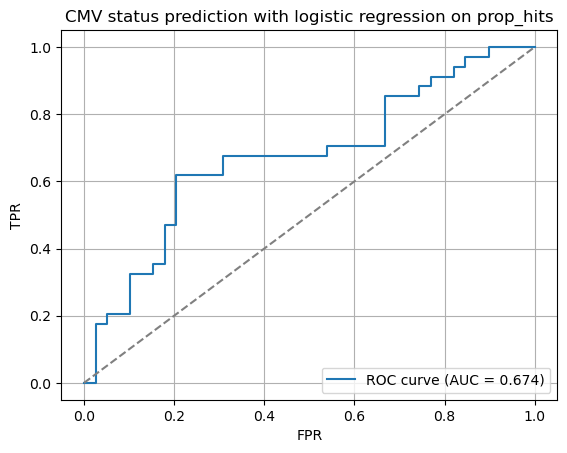

In [137]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')  # Diagonal line for reference
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'CMV status prediction with logistic regression on {var}')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Cross validation

In [ ]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold

# Set up cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

probs_cv = cross_val_predict(LogisticRegression(), X_scaled, y, cv=cv, method='predict_proba')[:, 1]

# Compute ROC AUC
auc_cv = roc_auc_score(y, probs_cv)
fpr_cv, tpr_cv, _ = roc_curve(y, probs_cv)

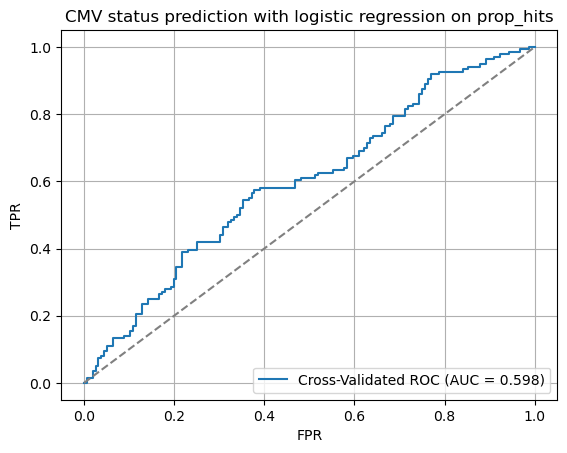

In [142]:
# Plot averaged ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr_cv, tpr_cv, label=f'Cross-Validated ROC (AUC = {auc_cv:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(f'CMV status prediction with logistic regression on {var}')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Some new features
- Take the top n clones in pt repertoire. 
    - What proportion are CMV-associated?
    - Add up counts of those that are CMV-associated?

- Rank repertoire by clone size
    - Output the rank at which the first CMV-associated sequence appears

In [ ]:
# Set HLA of interest
hla = 'A*02'
hla_name = hla.replace('*','')

# Set dirs
dir = '/Volumes/IshaVerbat/Isha/TCR/All_Emerson_Cohort01_cdr3_only'
metadata = pd.read_csv("/Users/ishaharris/Projects/TCR/TCR-Isha/data/Repertoires/Cohort01_whole_metadata.tsv", sep="\t") 


def get_annotat_files(hla):
    metadata_annotat = metadata[metadata['sample_tags'].str.contains(f'HLA-{hla}',case=False, regex = False)]

    metadata_annotat = metadata_annotat[metadata_annotat['sample_tags'].str.contains(r'\bcytomegalovirus|CNV\b', case=False, na=False)]
    metadata_annotat = metadata_annotat.reset_index(drop=True)

    file_names = [name + '.tsv' for name in metadata_annotat['sample_name'].tolist()]
    return file_names


ac02 = get_annotat_files(hla)
len(ac02)

292